# Behaviour suite

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepmind/bsuite/blob/master/bsuite/analysis/results.ipynb)

This is the official results page for `bsuite`. You can use this to:
- Get a snapshot of agent performance.
- Diagnose strengths/weaknesses of your agent.
- Leverage ready-made plots and analysis

In [1]:
#@title Imports
import warnings

#! pip install --quiet git+https://github.com/jjshoots/bsuite.git

from bsuite.experiments import summary_analysis
from bsuite.logging import csv_load
from bsuite.logging import sqlite_load

import numpy as np
import pandas as pd
import plotnine as gg

pd.options.mode.chained_assignment = None
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))
gg.theme_update(figure_size=(12, 8), panel_spacing_x=0.5, panel_spacing_y=0.5)
warnings.filterwarnings('ignore')

In [2]:
#@title Import experiment-specific analysis

from bsuite.experiments.bandit import analysis as bandit_analysis
from bsuite.experiments.bandit_noise import analysis as bandit_noise_analysis
from bsuite.experiments.bandit_scale import analysis as bandit_scale_analysis
from bsuite.experiments.cartpole import analysis as cartpole_analysis
from bsuite.experiments.cartpole_noise import analysis as cartpole_noise_analysis
from bsuite.experiments.cartpole_scale import analysis as cartpole_scale_analysis
from bsuite.experiments.cartpole_swingup import analysis as cartpole_swingup_analysis
from bsuite.experiments.catch import analysis as catch_analysis
from bsuite.experiments.catch_noise import analysis as catch_noise_analysis
from bsuite.experiments.catch_scale import analysis as catch_scale_analysis
from bsuite.experiments.deep_sea import analysis as deep_sea_analysis
from bsuite.experiments.deep_sea_stochastic import analysis as deep_sea_stochastic_analysis
from bsuite.experiments.discounting_chain import analysis as discounting_chain_analysis
from bsuite.experiments.memory_len import analysis as memory_len_analysis
from bsuite.experiments.memory_size import analysis as memory_size_analysis
from bsuite.experiments.mnist import analysis as mnist_analysis
from bsuite.experiments.mnist_noise import analysis as mnist_noise_analysis
from bsuite.experiments.mnist_scale import analysis as mnist_scale_analysis
from bsuite.experiments.mountain_car import analysis as mountain_car_analysis
from bsuite.experiments.mountain_car_noise import analysis as mountain_car_noise_analysis
from bsuite.experiments.mountain_car_scale import analysis as mountain_car_scale_analysis
from bsuite.experiments.umbrella_distract import analysis as umbrella_distract_analysis
from bsuite.experiments.umbrella_length import analysis as umbrella_length_analysis


##  Overall `bsuite` scores


Load your experiments below. We recommend a maximum of 5 result sets, for clarity of analysis.

The input to the `load_bsuite` function is a dict that maps from an experiment name of your choosing to the result path.

For an experiment that used CSV logging, this would map to the directory containing the results. For SQLite logging, this would map to the database file for that experiment.

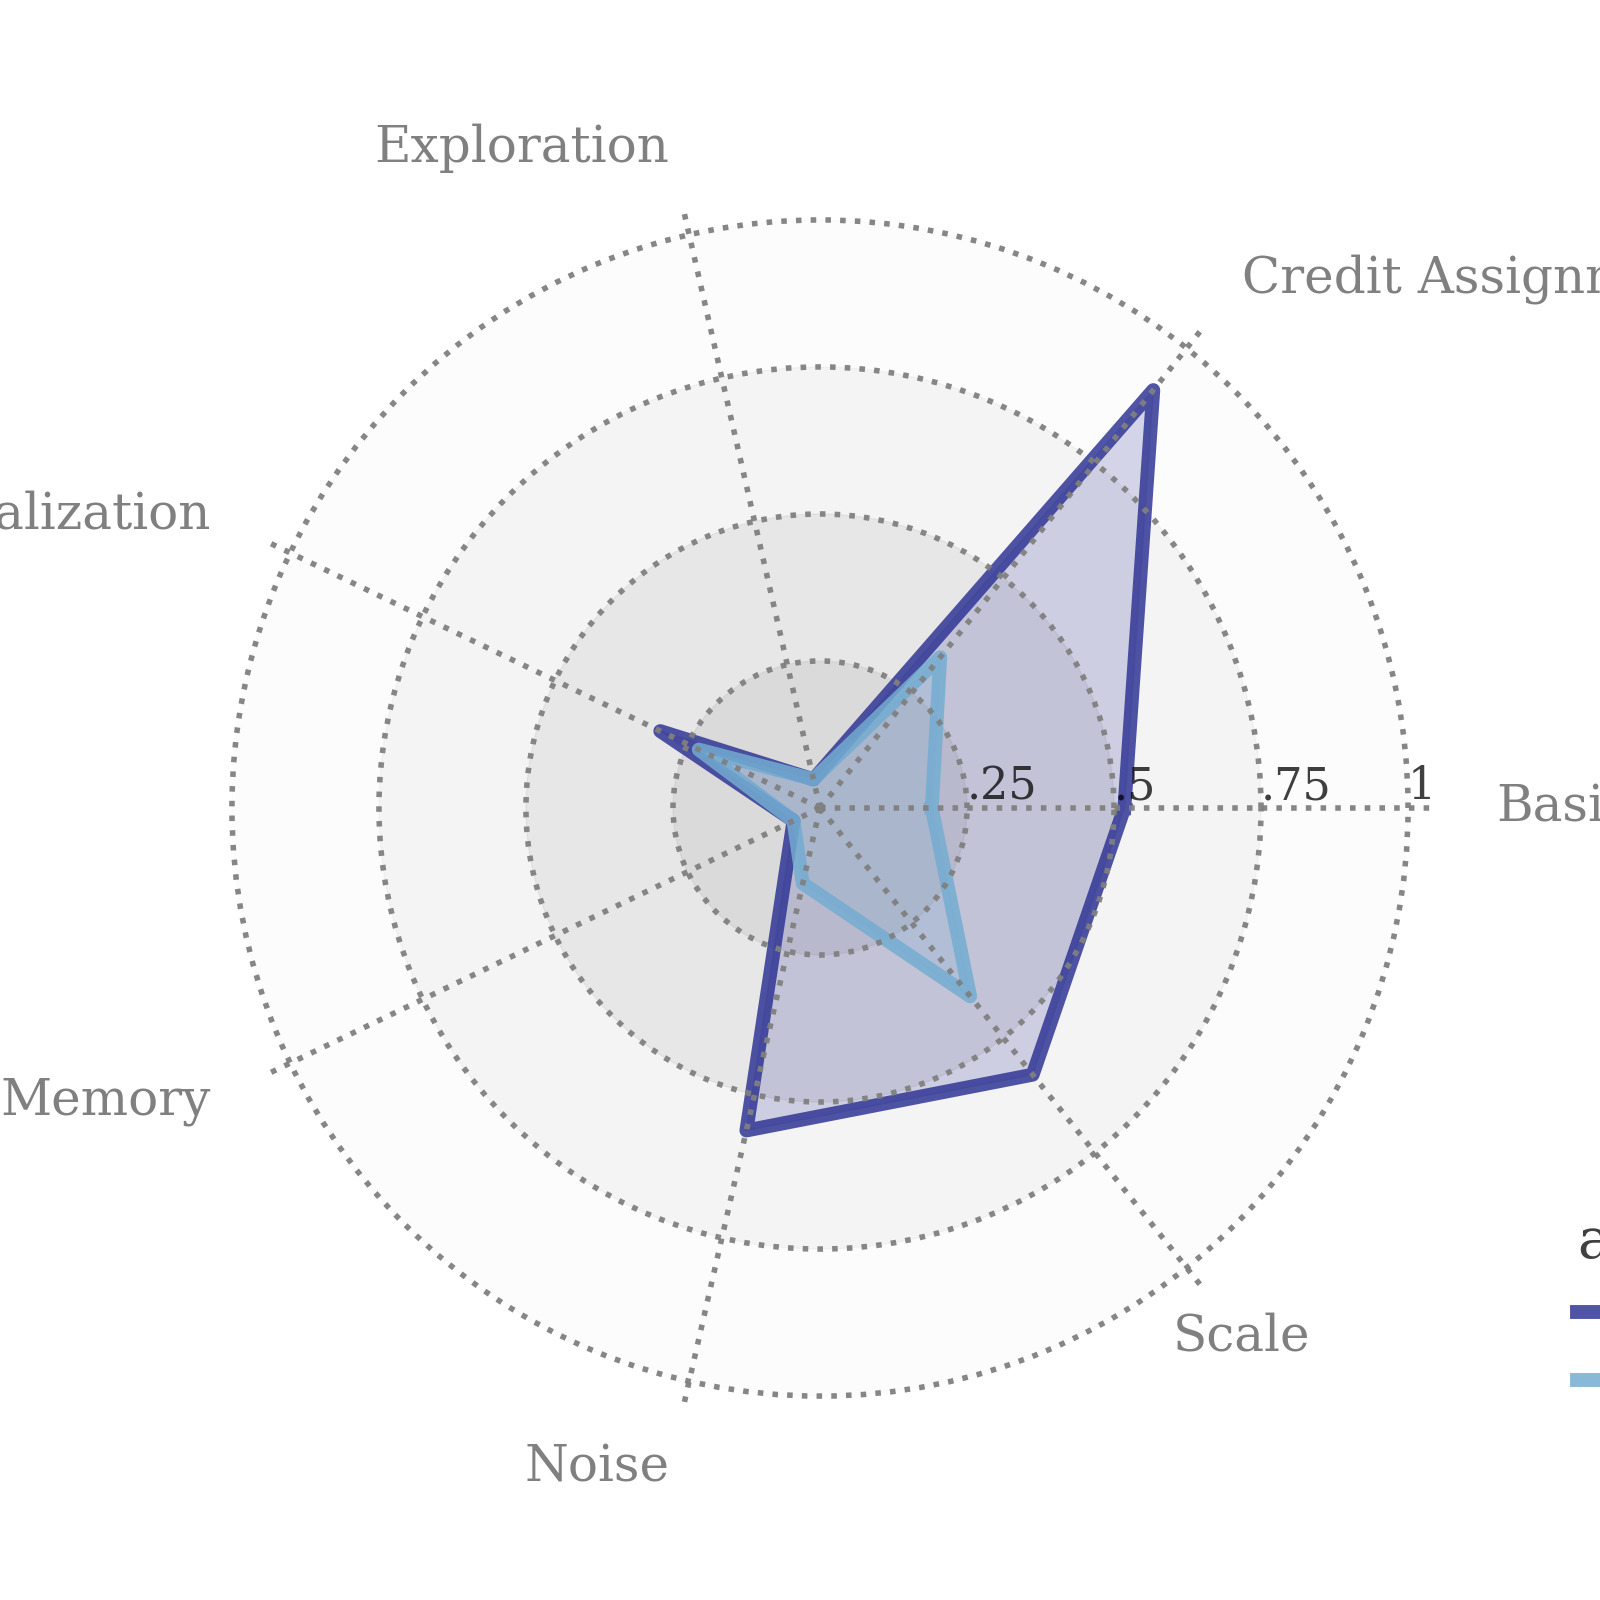

In [62]:
#@title loading results from local data:
experiments = {'results/PPO_Test_128', 'results/PPO_Test_128_lr_0005'}  # Add results here
# DF, SWEEP_VARS = sqlite_load.load_bsuite(experiments)
# Or
DF, SWEEP_VARS = csv_load.load_bsuite(experiments)
#@title overall score as radar plot (double-click to show/hide code)
BSUITE_SCORE = summary_analysis.bsuite_score(DF, SWEEP_VARS)
BSUITE_SUMMARY = summary_analysis.ave_score_by_tag(BSUITE_SCORE, SWEEP_VARS)
__radar_fig__ = summary_analysis.bsuite_radar_plot(BSUITE_SUMMARY, SWEEP_VARS)
__radar_fig__

In [63]:
BSUITE_SCORE

,agent_name,level_1,bsuite_env,score,type,tags,finished
0,results/PPO_Test_128,0,bandit,0.843460,basic,"('basic',)",True
1,results/PPO_Test_128,1,bandit_noise,0.812760,noise,"('noise',)",True
2,results/PPO_Test_128,2,bandit_scale,0.859120,scale,"('scale',)",True
3,results/PPO_Test_128,3,cartpole,0.636248,basic,"('basic', 'credit_assignment', 'generalization')",True
4,results/PPO_Test_128,4,cartpole_noise,0.612760,noise,"('noise', 'generalization')",True
5,results/PPO_Test_128,5,cartpole_scale,0.876895,scale,"('scale', 'generalization')",True
6,results/PPO_Test_128,6,catch,0.916375,basic,"('basic', 'credit_assignment')",True
7,results/PPO_Test_128,7,catch_noise,0.897375,noise,"('noise', 'credit_assignment')",True
8,results/PPO_Test_128,8,catch_scale,0.945875,scale,"('scale', 'credit_assignment')",True
9,results/PPO_Test_128,9,deep_sea,0.000000,exploration,"('exploration',)",True


In [52]:
BSUITE_SUMMARY

,agent_name,level_1,tag,score,agent
0,results/PPO_Test,0,basic,0.381516,results/PPO_Test
1,results/PPO_Test,1,generalization,0.141647,results/PPO_Test
2,results/PPO_Test,2,memory,0.000000,results/PPO_Test
3,results/PPO_Test,3,exploration,0.000000,results/PPO_Test
4,results/PPO_Test,4,noise,0.335793,results/PPO_Test
5,results/PPO_Test,5,scale,0.539804,results/PPO_Test
6,results/PPO_Test,6,credit_assignment,0.504923,results/PPO_Test
7,results/PPO_Test_128,0,basic,0.517583,results/PPO_Test_128
8,results/PPO_Test_128,1,generalization,0.301465,results/PPO_Test_128
9,results/PPO_Test_128,2,memory,0.000000,results/PPO_Test_128


**Parsing the plot above:**

- Snapshot of agent behaviour across key metrics as measured by bsuite.
- Length of each "spoke" represents score between 0 and 1.
- For more detailed analysis, click into specific challenge domains.

### Plotting scores per challenge in bar plot (click to show)

In [11]:
#@title plotting overall score as bar (double-click to show/hide code)
summary_analysis.bsuite_bar_plot(BSUITE_SCORE, SWEEP_VARS).draw();

**Parsing the plot above:**

- Height of each bar is the score on each challenge domain.
- Partially-finished runs are shown with transparent bars.
- Parameter/agent sweeps are automatically [faceted](http://www.sthda.com/english/wiki/ggplot2-facet-split-a-plot-into-a-matrix-of-panels) side by side.
- For more detailed analysis, click into specific challenge domains.

In [7]:
#@title compare agent performance on each challenge (double-click to show/hide code)
summary_analysis.bsuite_bar_plot_compare(BSUITE_SCORE, SWEEP_VARS).draw();

**Parsing the plot above:**

- Height of each bar is the score on each challenge domain.
- Partially-finished runs are shown with transparent bars.
- Each "facet" focuses on a separate environment.
- This plot allows for easier comparison between agents.
- For more detailed analysis, click into specific challenge domains.

# Individual challenge domains

This section of the report contains specific analysis for each individual `bsuite` experiment.

## Basic


We begin with a collection of very simple decision problems with standard analysis:
- Does the agent learn a reasonable rewarding policy?
- How quickly do they learn simple tasks?

We call these experiments "basic", since they are not particularly targeted at specific core issues.


### Bandit




<img src="https://storage.cloud.google.com/bsuite-colab-images/bandit.png" alt="bandit diagram" height="300"/>


A simple independent-armed bandit problem.

- The agent is faced with 11 actions with deterministic rewards [0.0, 0.1, .., 1.0] randomly assigned.
- Run over 20 seeds for 10k episodes.
- Score is 1 - 2 * average_regret at 10k episodes.
- Must log `episode`, `total_regret` for standard analysis.





In [8]:
#@title parsing data
bandit_df = DF[DF.bsuite_env == 'bandit'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'bandit', SWEEP_VARS).draw();

tags=('basic',)


In [9]:
#@title plot average regret through learning (lower is better)
bandit_analysis.plot_learning(bandit_df, SWEEP_VARS).draw();

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Parsing the plot above:**

- Here we can see the performance of the agent averaged over 20 seeds.
- Random policy has reward of 0  = regret of 0.5 = dashed line
- Want to see a stable learning curve -> 0 and fast!
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.


In [ ]:
#@title plot performance by seed (higher is better)
bandit_analysis.plot_seeds(bandit_df, SWEEP_VARS).draw();

### MNIST




<img src="https://storage.cloud.google.com/bsuite-colab-images/mnist.png" alt="mnist diagram" height="300"/>

The "hello world" of deep learning, now as a contextual bandit.

- Every timestep the agent must classify a random MNIST digit.
- Reward +1 for correct, -1 for incorrect.
- Run for 10k episodes, 20 seeds.
- Score is percentage of successful classifications.
- Must log `episode`, `total_regret` for standard analysis.

In [ ]:
#@title parsing data
mnist_df = DF[DF.bsuite_env == 'mnist'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'mnist', SWEEP_VARS).draw();

In [ ]:
#@title plot average regret through learning (lower is better)
mnist_analysis.plot_learning(mnist_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of the agent averaged over 20 seeds.
- Random policy has reward of 0  = regret of 1.8 = dashed line
- Want to see a stable learning curve -> 0 and fast!
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.


In [ ]:
#@title plot performance by seed (higher is better)
mnist_analysis.plot_seeds(mnist_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Catch

<img src="https://storage.cloud.google.com/bsuite-colab-images/catch.png" alt="catch diagram" height="300"/>


DeepMind's internal "hello world" for RL agents.

- The environment is a 5x10 grid with a single falling block per episodes (similar to Tetris).
- The agent controls a single "paddle" pixel that it should use to "catch" the falling block.
- If the agent catches the block reward +1, if the agent misses the block reward -1.
-   Run the agent for 10k episodes and 20 seeds.
-   Score is percentage of successful "catch" over first 10k episodes.
-   Must log `episode`, `total_regret` for standard analysis.



In [ ]:
#@title parsing data
catch_df = DF[DF.bsuite_env == 'catch'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'catch', SWEEP_VARS).draw();

In [ ]:
#@title plot average regret through learning (lower is better)
catch_analysis.plot_learning(catch_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of the agent averaged over 20 seeds.
- Random policy has reward of 0  = regret of 1.6 = dashed line
- Want to see a stable learning curve -> 0 and fast!
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.


In [ ]:
#@title plot performance by seed (higher is better)
catch_analysis.plot_seeds(catch_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Mountain car

<img src="https://storage.cloud.google.com/bsuite-colab-images/mountain_car.png" alt="mountaincar diagram" height="300"/>

A classic benchmark problem in RL.
The agent controls an underpowered car and must drive it out of a valley.

- Reward of -1 each step until the car reaches the goal.
- Maximum episode length of 1000 steps.
- Run 1000 episodes for 20 seeds.
- Score is based on regret against "good" policy that solves in 25 steps.
- Must log `episode`, `total_regret` for standard analysis.


In [ ]:
#@title parsing data
mountain_car_df = DF[DF.bsuite_env == 'mountain_car'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'mountain_car', SWEEP_VARS).draw();

In [ ]:
#@title plot average regret through learning (lower is better)
mountain_car_analysis.plot_learning(mountain_car_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of the agent averaged over 20 seeds.
- Dashed line is at 415 = average regret of a random agent.
- Want to see a stable learning curve -> 0 and fast!
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.

In [ ]:
#@title plot performance by seed (higher is better)
mountain_car_analysis.plot_seeds(mountain_car_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Cartpole




<img src="https://storage.cloud.google.com/bsuite-colab-images/cartpole.png" alt="cartpole diagram" height="300"/>

A classic benchmark problem in RL.
The agent controls a cart on a frictionless plane.

- The poles starts near-to upright.
- The observation is [x, x_dot, sin(theta), sin(theta)_dot, cos(theta), cos(theta)_dot, time_elapsed]
- Episodes end once 1000 steps have occured, or |x| is greater than 1.
- Reward of +1 when pole > 0.8 height.
- Run 1000 episodes for 20 seeds.
- Score is percentage of timesteps balancing the pole.
- Must log `episode`, `total_regret` for standard analysis.


In [ ]:
#@title parsing data
cartpole_df = DF[DF.bsuite_env == 'cartpole'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'cartpole', SWEEP_VARS).draw();

In [ ]:
#@title plot average regret through learning (lower is better)
cartpole_analysis.plot_learning(cartpole_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of the agent averaged over 20 seeds.
- Maximum regret of 1000 per episode = dashed line
- Want to see a stable learning curve -> 0 and fast!
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.

In [ ]:
#@title plot performance by seed (higher is better)
cartpole_analysis.plot_seeds(cartpole_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

## Reward noise

To investigate the robustness of RL agents to noisy rewards, we repeat the "basic" experiments under differing levels of Gaussian noise.

This time we allocate the 20 different seeds across 5 levels of Gaussian noise $N(0, \sigma^2)$ for $\sigma$ = noise\_scale = $[0.1, 0.3, 1, 3, 10]$ with 4 seeds each.

### Bandit noise

<img src="https://storage.cloud.google.com/bsuite-colab-images/bandit.png" alt="bandit diagram" height="300"/>


A simple independent-armed bandit problem.

- The agent is faced with 11 actions with deterministic rewards [0.0, 0.1, .., 1.0] randomly assigned.
- Run noise_scale = [0.1, 0.3, 1., 3, 10] for 4 seeds for 10k episodes.
- Score is 1 - 2 * average_regret at 10k episodes.
- Must log `episode`, `total_regret` for standard analysis.


In [ ]:
#@title parsing data
bandit_noise_df = DF[DF.bsuite_env == 'bandit_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'bandit_noise', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
bandit_noise_analysis.plot_average(bandit_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for largest noise_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
bandit_noise_analysis.plot_learning(bandit_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for largest noise_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
bandit_noise_analysis.plot_seeds(bandit_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### MNIST noise


<img src="https://storage.cloud.google.com/bsuite-colab-images/mnist.png" alt="mnist diagram" height="300"/>

The "hello world" of deep learning, now as a contextual bandit.

- Every timestep the agent must classify a random MNIST digit.
- Reward +1 for correct, -1 for incorrect.
- Run noise_scale = [0.1, 0.3, 1., 3, 10] for 4 seeds for 10k episodes.
- Score is percentage of successful classifications.
- Must log `episode`, `total_regret` for standard analysis.

In [ ]:
#@title parsing data
mnist_noise_df = DF[DF.bsuite_env == 'mnist_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'mnist_noise', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
mnist_noise_analysis.plot_average(mnist_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for largest noise_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
mnist_noise_analysis.plot_learning(mnist_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for largest noise_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
mnist_noise_analysis.plot_seeds(mnist_noise_df, SWEEP_VARS).draw;

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Catch noise

<img src="https://storage.cloud.google.com/bsuite-colab-images/catch.png" alt="catch diagram" height="300"/>


DeepMind's internal "hello world" for RL agents.

- The environment is a 5x10 grid with a single falling block per episodes (similar to Tetris).
- The agent controls a single "paddle" pixel that it should use to "catch" the falling block.
- If the agent catches the block reward +1, if the agent misses the block reward -1.
- Run noise_scale = [0.1, 0.3, 1., 3, 10] for 4 seeds for 10k episodes.
-   Score is percentage of successful "catch" over first 10k episodes.
-   Must log `episode`, `total_regret` for standard analysis.



In [ ]:
#@title parsing data
catch_noise_df = DF[DF.bsuite_env == 'catch_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'catch_noise', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
catch_noise_analysis.plot_average(catch_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for largest noise_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
catch_noise_analysis.plot_learning(catch_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for largest noise_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
catch_noise_analysis.plot_seeds(catch_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Mountain car noise

<img src="https://storage.cloud.google.com/bsuite-colab-images/mountain_car.png" alt="mountaincar diagram" height="300"/>

A classic benchmark problem in RL.
The agent controls an underpowered car and must drive it out of a valley.

- Reward of -1 each step until the car reaches the goal.
- Maximum episode length of 1000 steps.
- Run noise_scale = [0.1, 0.3, 1., 3, 10] for 4 seeds for 1k episodes.
- Score is based on regret against "good" policy that solves in 25 steps.
- Must log `episode`, `total_regret` for standard analysis.


In [ ]:
#@title parsing data
mountain_car_noise_df = DF[DF.bsuite_env == 'mountain_car_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'mountain_car_noise', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
mountain_car_noise_analysis.plot_average(mountain_car_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for largest noise_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
mountain_car_noise_analysis.plot_learning(mountain_car_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for largest noise_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
mountain_car_noise_analysis.plot_seeds(mountain_car_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Cartpole noise


<img src="https://storage.cloud.google.com/bsuite-colab-images/cartpole.png" alt="cartpole diagram" height="300"/>

A classic benchmark problem in RL.
The agent controls a cart on a frictionless plane.

- The poles starts near-to upright.
- The observation is [x, x_dot, sin(theta), sin(theta)_dot, cos(theta), cos(theta)_dot, time_elapsed]
- Episodes end once 1000 steps have occured, or |x| is greater than 1.
- Reward of +1 when pole > 0.8 height.
- Run noise_scale = [0.1, 0.3, 1., 3, 10] for 4 seeds for 1k episodes.
- Score is percentage of timesteps balancing the pole.
- Must log `episode`, `total_regret` for standard analysis.


In [ ]:
#@title parsing  data
cartpole_noise_df = DF[DF.bsuite_env == 'cartpole_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'cartpole_noise', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
cartpole_noise_analysis.plot_average(cartpole_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for largest noise_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
cartpole_noise_analysis.plot_learning(cartpole_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by noise_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for largest noise_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
cartpole_noise_analysis.plot_seeds(cartpole_noise_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

## Reward scale

To investigate the robustness of RL agents to reward rewards, we repeat the "basic" experiments under differing levels of problem rescaling.

This time we allocate the 20 different seeds across 5 levels of reward\_scale = $[0.1, 0.3, 1, 3, 10]$ with 4 seeds each.

In order to keep comparable statistics/regret we report rescaled regret/reward\_scale.

### Bandit scale

<img src="https://storage.cloud.google.com/bsuite-colab-images/bandit.png" alt="bandit diagram" height="300"/>


A simple independent-armed bandit problem.

- The agent is faced with 11 actions with deterministic rewards [0.0, 0.1, .., 1.0] randomly assigned.
- Run reward_scale = [0.01, 0.1, 1., 10, 100] for 4 seeds for 10k episodes.
- Score is 1 - 2 * average_regret at 10k episodes.
- Must log `episode`, `total_regret` for standard analysis.


In [ ]:
#@title parsing data
bandit_scale_df = DF[DF.bsuite_env == 'bandit_scale'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'bandit_scale', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
bandit_scale_analysis.plot_average(bandit_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for reward_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
bandit_scale_analysis.plot_learning(bandit_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for reward_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
bandit_scale_analysis.plot_seeds(bandit_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### MNIST scale


<img src="https://storage.cloud.google.com/bsuite-colab-images/mnist.png" alt="mnist diagram" height="300"/>

The "hello world" of deep learning, now as a contextual bandit.

- Every timestep the agent must classify a random MNIST digit.
- Reward +1 for correct, -1 for incorrect.
- Run reward_scale = [0.01, 0.1, 1., 10, 100] for 4 seeds for 10k episodes.
- Score is percentage of successful classifications.
- Must log `episode`, `total_regret` for standard analysis.

In [ ]:
#@title parsing data
mnist_scale_df = DF[DF.bsuite_env == 'mnist_scale'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'mnist_scale', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
mnist_scale_analysis.plot_average(mnist_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for reward_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
mnist_scale_analysis.plot_learning(mnist_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for reward_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
mnist_scale_analysis.plot_seeds(mnist_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Catch scale

<img src="https://storage.cloud.google.com/bsuite-colab-images/catch.png" alt="catch diagram" height="300"/>


DeepMind's internal "hello world" for RL agents.

- The environment is a 5x10 grid with a single falling block per episodes (similar to Tetris).
- The agent controls a single "paddle" pixel that it should use to "catch" the falling block.
- If the agent catches the block reward +1, if the agent misses the block reward -1.
- Run reward_scale = [0.01, 0.1, 1., 10, 100] for 4 seeds for 10k episodes.
-   Score is percentage of successful "catch" over first 10k episodes.
-   Must log `episode`, `total_regret` for standard analysis.



In [ ]:
#@title parsing data
catch_scale_df = DF[DF.bsuite_env == 'catch_scale'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'catch_scale', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
catch_scale_analysis.plot_average(catch_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for reward_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
catch_scale_analysis.plot_learning(catch_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for reward_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
catch_scale_analysis.plot_seeds(catch_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Mountain car scale

<img src="https://storage.cloud.google.com/bsuite-colab-images/mountain_car.png" alt="mountaincar diagram" height="300"/>

A classic benchmark problem in RL.
The agent controls an underpowered car and must drive it out of a valley.

- Reward of -1 each step until the car reaches the goal.
- Maximum episode length of 1000 steps.
- Run reward_scale = [0.01, 0.1, 1., 10, 100] for 4 seeds for 1k episodes.
- Score is based on regret against "good" policy that solves in 25 steps.
- Must log `episode`, `total_regret` for standard analysis.


In [ ]:
#@title parsing data
mountain_car_scale_df = DF[DF.bsuite_env == 'mountain_car_scale'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'mountain_car_scale', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
mountain_car_scale_analysis.plot_average(mountain_car_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for reward_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
mountain_car_scale_analysis.plot_learning(mountain_car_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for reward_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
mountain_car_scale_analysis.plot_seeds(mountain_car_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Cartpole scale


<img src="https://storage.cloud.google.com/bsuite-colab-images/cartpole.png" alt="cartpole diagram" height="300"/>

A classic benchmark problem in RL.
The agent controls a cart on a frictionless plane.

- The poles starts near-to upright.
- The observation is [x, x_dot, sin(theta), sin(theta)_dot, cos(theta), cos(theta)_dot, time_elapsed]
- Episodes end once 1000 steps have occured, or |x| is greater than 1.
- Reward of +1 when pole > 0.8 height.
- Run reward_scale = [0.01, 0.1, 1., 10, 100] for 4 seeds for 1k episodes.
- Score is percentage of timesteps balancing the pole.
- Must log `episode`, `total_regret` for standard analysis.


In [ ]:
#@title parsing data
cartpole_scale_df = DF[DF.bsuite_env == 'cartpole_scale'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'cartpole_scale', SWEEP_VARS).draw();

In [ ]:
#@title average regret over learning (lower is better)
cartpole_scale_analysis.plot_average(cartpole_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agents.
- Look for reward_scale with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
cartpole_scale_analysis.plot_learning(cartpole_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by reward_scale (lower is better)
- Dashed line shows the performance of a random agent baseline.
- Look for reward_scale with performance significantly better than baseline.

In [ ]:
#@title plot performance by seed (higher is better)
cartpole_scale_analysis.plot_seeds(cartpole_scale_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

## Exploration

Exploration is the problem of prioritizing useful information for learning.

### Deep sea



<img src="https://storage.cloud.google.com/bsuite-colab-images/deep_sea.png" alt="deep sea diagram" height="300"/>

Scalable chain domains that test for
[deep exploration](https://arxiv.org/abs/1703.07608).

The environment is an N x N grid with falling blocks similar to catch. However
the block always starts in the top left. In each timestep, the agent can move
the block "left" or "right". At each timestep, there is a small cost for moving
"right" and no cost for moving "left". However, the agent can receive a large
reward for choosing "right" N-times in a row and reaching the bottom right. This
is the single rewarding policy, all other policies receive zero or negative
return making this a very difficult exploration problem.

-   Run deep_sea sizes N=5,6,7,..,50 for at least 10k episodes.
-   Score is the percentage of N for which average regret < 0.9 faster than 2^N.
-   Must log `episode`, `total_return` for standard analysis.

In [ ]:
#@title parsing data
deep_sea_df = DF[DF.bsuite_env == 'deep_sea'].copy()
deep_sea_plt = deep_sea_analysis.find_solution(deep_sea_df, SWEEP_VARS)
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'deep_sea', SWEEP_VARS).draw();

In [ ]:
#@title average regret by size through learning (lower is better)
deep_sea_analysis.plot_regret(deep_sea_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Learning curves of average regret through time (lower is better).
- Dashed line shows the performance of suboptimal "greedy" algorithm
- Look for largest size with performance significantly better than greedy agent.
- Curves also show dynamics through time.

In [ ]:
#@title scaling of learning time with deep_sea size (lower + more blue is better)
deep_sea_analysis.plot_scaling(deep_sea_plt, SWEEP_VARS).draw();

**Parsing the plot above:**
- Compute the number of episodes until the average regret < 0.9 for each problem size.
- Red dots have *not* solved the problem, but have simply performed only that many episodes.
- Dashed line shows curve 2^N, which is the scaling we expect for agents without deep exploration.
- Want to see consistent curve of blue dots signficantly *below* the dashed line -> deep exploration.

In [ ]:
#@title scaling of learning time with deep_sea size on log scale (lower + more blue is better)
deep_sea_analysis.plot_scaling_log(deep_sea_plt, SWEEP_VARS).draw();

**Parsing the plot above:**
- Plots exactly the same data as above, but on a logarithmic scale.
- If we see polynomial scaling -> this should result in a linear relationship between log(learning time) and log(size).
- Want to see consistent line of blue dots significantly below the dashed line -> deep exploration.

In [ ]:
#@title plot performance by seed (higher is better)
deep_sea_analysis.plot_seeds(deep_sea_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Stochastic deep sea



<img src="https://storage.cloud.google.com/bsuite-colab-images/deep_sea.png" alt="deep sea stochastic diagram" height="300"/>

Scalable chain domains that test for
[deep exploration](https://arxiv.org/abs/1703.07608).

The environment is an N x N grid with falling blocks similar to catch. However
the block always starts in the top left. In each timestep, the agent can move
the block "left" or "right". At each timestep, there is a small cost for moving
"right" and no cost for moving "left". However, the agent can receive a large
reward for choosing "right" N-times in a row and reaching the bottom right. This
is the single rewarding policy, all other policies receive zero or negative
return making this a very difficult exploration problem.

The stochastic version of this domain only transitions to the right with
probability (1 - 1/N) and adds N(0,1) noise to the 'end' states of the chain.

-   Run deep_sea sizes N=5,6,7,..,50 for at least 10k episodes.
-   Score is the percentage of N for which average regret < 0.9 faster than 2^N.
-   Must log `episode`, `total_return` for standard analysis.

In [ ]:
#@title parsing data
deep_sea_stochastic_df = DF[DF.bsuite_env == 'deep_sea_stochastic'].copy()
deep_sea_stochastic_plt = deep_sea_stochastic_analysis.find_solution(deep_sea_stochastic_df, SWEEP_VARS)
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'deep_sea_stochastic', SWEEP_VARS).draw();

In [ ]:
#@title average regret by size through learning (lower is better)
deep_sea_stochastic_analysis.plot_regret(deep_sea_stochastic_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Learning curves of average regret through time (lower is better).
- Dashed line shows the performance of suboptimal "greedy" algorithm
- Look for largest size with performance significantly better than greedy agent.
- Curves also show dynamics through time.

In [ ]:
#@title scaling of learning time with deep_sea_stochastic size (lower + more blue is better)
deep_sea_stochastic_analysis.plot_scaling(deep_sea_stochastic_plt, SWEEP_VARS).draw();

**Parsing the plot above:**
- Compute the number of episodes until the average regret < 0.9 for each problem size.
- Red dots have *not* solved the problem, but have simply performed only that many episodes.
- Dashed line shows curve 2^N, which is the scaling we expect for agents without deep exploration.
- Want to see consistent curve of blue dots signficantly *below* the dashed line -> deep exploration.

In [ ]:
#@title scaling of learning time with deep_sea size on log scale (lower + more blue is better)
deep_sea_stochastic_analysis.plot_scaling_log(deep_sea_stochastic_plt, SWEEP_VARS).draw();

**Parsing the plot above:**
- Plots exactly the same data as above, but on a logarithmic scale.
- If we see polynomial scaling -> this should result in a linear relationship between log(learning time) and log(size).
- Want to see consistent line of blue dots significantly below the dashed line -> deep exploration.

In [ ]:
#@title plot performance by seed (higher is better)
deep_sea_stochastic_analysis.plot_seeds(deep_sea_stochastic_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Cartpole swingup



<img src="https://storage.cloud.google.com/bsuite-colab-images/cartpole.png" alt="cartpole diagram" height="300"/>

A difficult cartpole swingup task with sparse rewards and a cost for moving.
This domain is somewhat similar to "deep sea" but cannot be solved easily by tabular reinforcement learning algorithms.

- The observation is `[x, cos_theta, sin_theta, x_dot, theta_dot, x_central]`
- The dynamics are given by the classic cartpole from dm [control suite](https://github.com/deepmind/dm_control/blob/master/all_domains.png)
- Each episode begins with the pole hanging downwards and ends after 1000 timesteps.
- There is a small cost of -0.1 for any movement of the pole.
- There is a reward of +1 only if:
  - x_dot, theta_dot < 1
  - pole_height > 1 - `difficulty_scale`
  - x < 1 - `difficulty_scale`

The parameter `difficulty_scale` acts as a scaling for the depth of exploration, similar to the "size" in deep sea.
To run this experiment:

- Run the agent on difficulty_scale = 0, 0.05, 0.1, .. , 0.95 for 1k episodes
- Score is proportion of runs that achieve an average_return > 0 at any point.
- Must log `episode`, `total_return` for standard analysis


In [ ]:
#@title parsing data
cartpole_swingup_df = DF[DF.bsuite_env == 'cartpole_swingup'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'cartpole_swingup', SWEEP_VARS).draw();

In [ ]:
#@title scaling with difficulty scale (higher + more blue is better)
cartpole_swingup_analysis.plot_scale(cartpole_swingup_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- For each height threshold, look at the best observed return.
- If the observed return is greater than 500 ==> the pole was swung upright and balanced for at least 5 seconds.
- Look for higher scores and more blue.

In [ ]:
#@title average regret through learning (lower is better)
cartpole_swingup_analysis.plot_learning(cartpole_swingup_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Learning curves of average return through time (higher is better).
- Dashed line shows the performance of an agent that does not move = 0.
- Look for largest difficulty_scale with performance significantly better than staying still.

In [ ]:
#@title plot performance by seed (higher is better)
cartpole_swingup_analysis.plot_seeds(cartpole_swingup_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

## Credit assignment

This is a collection of domains for credit assignment.

### Umbrella length

<img src="https://storage.cloud.google.com/bsuite-colab-images/umbrella.png" alt="umbrella diagram" height="300"/>

A stylized problem designed to highlight problems to do with temporal credit assignment and scaling with time horizon.

- The state observation is [need_umbrella, have_umbrella, time_to_go,] + n "distractor" features that are iid Bernoulli.
- At the start of each episode the agent observes if it will need an umbrella.
- It then has the chance to pick up an umbrella only in the first timestep.
- At the end of the episode the agent receives a reward of +1 if it made the correct choice of umbrella, but -1 if it made the incorrect choice.
- During chain_length intermediate steps rewards are random +1 or -1.

The experiment setup:
- Run umbrella_chain with n_distractor=20 and sweep chain_length=1..100 logarithmically spaced for 10k episodes.
- Score is percent of tasks with average reward per episode > 0.5.
- Must log `episode`, `total_return`, `total_regret` for standard analysis.

In [ ]:
#@title parsing data
umbrella_length_df = DF[DF.bsuite_env == 'umbrella_length'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'umbrella_length', SWEEP_VARS).draw();

In [ ]:
#@title average regret after 10k episodes (lower is better)
umbrella_length_analysis.plot_scale(umbrella_length_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Compute the average regret after 10k episodes for each chain_length problem scale.
- Red dots have *not* solved the problem, blue dots made significant progress (average regret < 0.5)
- Dashed line shows regret of a random agent = 1.0.
- We want to see lots of blue dots with low regret for large chain_length.

In [ ]:
#@title average regret through learning (lower is better)
umbrella_length_analysis.plot_learning(umbrella_length_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Learning curves of average regret through time (lower is better).
- Dashed line shows the performance of a random agents (regret = 1.0)
- Look for largest chain_length with performance significantly better than random agent.
- Curves also show dynamics through time.
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.

In [ ]:
#@title plot performance by seed (higher is better)
umbrella_length_analysis.plot_seeds(umbrella_length_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Umbrella distract

<img src="https://storage.cloud.google.com/bsuite-colab-images/umbrella.png" alt="umbrella diagram" height="300"/>


A stylized problem designed to highlight problems to do with temporal credit assignment and scaling with time horizon.

- The state observation is [need_umbrella, have_umbrella, time_to_go,] + n "distractor" features that are iid Bernoulli.
- At the start of each episode the agent observes if it will need an umbrella.
- It then has the chance to pick up an umbrella only in the first timestep.
- At the end of the episode the agent receives a reward of +1 if it made the correct choice of umbrella, but -1 if it made the incorrect choice.
- During chain_length intermediate steps rewards are random +1 or -1.

The experiment setup:
- Run umbrella_chain with n_distractor=20 and sweep chain_length=1..100 logarithmically spaced for 10k episodes.
- Score is percent of tasks with average reward per episode > 0.5.
- Must log `episode`, `total_return`, `total_regret` for standard analysis.

In [ ]:
#@title parsing data
umbrella_distract_df = DF[DF.bsuite_env == 'umbrella_distract'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'umbrella_distract', SWEEP_VARS).draw();

In [ ]:
#@title average regret after 10k episodes (lower is better)
umbrella_distract_analysis.plot_scale(umbrella_distract_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Compute the average regret after 10k episodes for each chain_length problem scale.
- Red dots have *not* solved the problem, blue dots made significant progress (average regret < 0.5)
- Dashed line shows regret of a random agent = 1.0.
- We want to see lots of blue dots with low regret for large chain_length.

In [ ]:
#@title average regret through learning (lower is better)
umbrella_distract_analysis.plot_learning(umbrella_distract_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Learning curves of average regret through time (lower is better).
- Dashed line shows the performance of a random agents (regret = 1.0)
- Look for largest chain_length with performance significantly better than random agent.
- Curves also show dynamics through time.
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.

In [ ]:
#@title plot performance by seed (higher is better)
umbrella_distract_analysis.plot_seeds(umbrella_distract_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Discounting chain

<img src="https://storage.cloud.google.com/bsuite-colab-images/discounting_chain.png" alt="discount diagram" height="300"/>

A stylized problem designed to highlight an agent's ability to correctly maximize cumulative rewards without discounting bias.
- The only decision that actually matters is the agent's *first* of the episode, after which the agent is locked into a "chain" irrespective of actions.
- Each chain gives a non-zero reward only at one step of the length-100 episode: [1, 3, 10, 30, 100] steps.
- Each chain gives a reward of +1, except for the optimal_horizon, which gives a reward of +1.1
- Many agents with discounting will struggle to maximize cumulative returns.

The experiment setup:
- Run each optimal_horizon [1, 3, 10, 30, 100], each with 5 seeds for 1k episodes.
- Score is average regret * 10.
- Must log `episode`, `total_return` for standard analysis

In [ ]:
#@title parsing data
discounting_chain_df = DF[DF.bsuite_env == 'discounting_chain'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'discounting_chain', SWEEP_VARS).draw();

In [ ]:
#@title average regret after 1k episodes (lower is better)
discounting_chain_analysis.plot_average(discounting_chain_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Display the average regret after 10k episodes by optimal_horizon (lower is better)
- Dashed line shows the performance of a random agents (regret = 0.8)
- Look for largest horizon with performance significantly better than random agent.

In [ ]:
#@title average regret through learning (lower is better)
discounting_chain_analysis.plot_learning(discounting_chain_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Learning curves of average regret through time (lower is better).
- Dashed line shows the performance of a random agents (regret = 0.8)
- Look for largest horizon with performance significantly better than random agent.
- Curves also show dynamics through time.
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.

In [ ]:
#@title plot performance by seed (higher is better)
discounting_chain_analysis.plot_seeds(discounting_chain_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

## Memory

A collection of experiments designed to test memory capabilities.

### Memory length

<img src="https://storage.cloud.google.com/bsuite-colab-images/memory_chain.png" alt="memory diagram" height="300"/>


A stylized [T-maze](https://en.wikipedia.org/wiki/T-maze) problem designed to highlight an agent's ability to remember important information and use it to make good decisions.
- At the beginning of the episode the agent is provided a context of +1 or -1.
- At all future timesteps the context is equal to zero and a countdown until the end of the episode.
- At the end of the episode the agent must select the correct action corresponding to the context to reward +1 or -1.

The experiment setup:
- Run memory sizes 1..100 logarithmically spaced.
- Score is proportion of memory sizes with average regret < 0.5.
- Must log `episode`, `total_return` for standard analysis

In [ ]:
#@title parsing data
memory_len_df = DF[DF.bsuite_env == 'memory_len'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'memory_len', SWEEP_VARS).draw();

In [ ]:
#@title memory scaling (lower + more blue is better)
memory_len_analysis.plot_scale(memory_len_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Compute the average regret after 10k episodes for each memory_length problem scale.
- Red dots have *not* solved the problem, blue dots made significant progress (average regret < 0.5)
- Dashed line shows regret of a random agent = 1.0.
- We want to see lots of blue dots with low regret for large memory_length.

In [ ]:
#@title average regret through learning (lower is better)
memory_len_analysis.plot_learning(memory_len_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Learning curves of average regret through time (lower is better).
- Dashed line shows the performance of a random agents (regret = 1.0)
- Look for largest memory_length with performance significantly better than random agent.
- Curves also show dynamics through time.
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.

In [ ]:
#@title plot performance by seed (higher is better)
memory_len_analysis.plot_seeds(memory_len_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

### Memory size)

<img src="https://storage.cloud.google.com/bsuite-colab-images/memory_chain.png" alt="memory diagram" height="300"/>

A stylized [T-maze](https://en.wikipedia.org/wiki/T-maze) problem designed to highlight an agent's ability to remember important information and use it to make good decisions.
- At the beginning of an episode the agent is provided an N bit context vector.
- After a couple of steps the agent is provided a query as an integer number between `0` and `num_bits-1` and must select the correct action corresponding to `context[query]`.

The experiment setup:
- Run memory sizes 1..100 logarithmically spaced.
- Score is proportion of memory sizes with average regret < 0.5.
- Must log `episode`, `total_return` for standard analysis

In [ ]:
#@title parsing data
memory_size_df = DF[DF.bsuite_env == 'memory_size'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'memory_size', SWEEP_VARS).draw();

In [ ]:
#@title memory scaling (lower + more blue is better)
memory_size_analysis.plot_scale(memory_size_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Compute the average regret after 10k episodes for each memory_sizegth problem scale.
- Red dots have *not* solved the problem, blue dots made significant progress (average regret < 0.5)
- Dashed line shows regret of a random agent = 1.0.
- We want to see lots of blue dots with low regret for large memory_sizegth.

In [ ]:
#@title average regret through learning (lower is better)
memory_size_analysis.plot_learning(memory_size_df, SWEEP_VARS).draw();

**Parsing the plot above:**
- Learning curves of average regret through time (lower is better).
- Dashed line shows the performance of a random agents (regret = 1.0)
- Look for largest memory_length with performance significantly better than random agent.
- Curves also show dynamics through time.
- Smoothing is performed with rolling mean over 10% of data with confidence bar at 95% Gaussian standard error.

In [ ]:
#@title plot performance by seed (higher is better)
memory_size_analysis.plot_seeds(memory_size_df, SWEEP_VARS).draw();

**Parsing the plot above:**

- Here we can see the performance of each agent individually through time.
- Higher scores are better, but individual runs may be noisy.
- Use this plot to diagnose strange agent behaviour.

## Exporting as PDF

- Run all colab cells above in `Colaboratory`
- Run the cell below to download a compressed `images.zip`
- Copy `images/` in `bsuite/reports/images`
- Run `bsuite/reports/bsuite_report.tex` to generate a summary pdf report

In [ ]:
import os
from google.colab import files

# Save images required for the reports in an `images/` folder.
if not os.path.exists('images'):
  os.makedirs('images')

__radar_fig__.savefig('images/radar_plot.png', bbox_inches="tight")

# Compress folder and download
!zip -r /images.zip /content/images > /dev/null
try:
  files.download("images.zip")
except:
  pass